NucFreq/VerityMap flagged regions:  3623
Index(['contig', 'start', 'end', 'name', 'est_size', 'sample', 'region_type',
       'region_source', 'curated', 'ont_support', 'hifi_support', 'software',
       'read_source', 'region_start', 'region_end', 'hifi_MQ0_mean_cov',
       'hifi_MQ0_mean_cov_pct', 'hifi_MQ0_median_cov',
       'hifi_MQ0_median_cov_pct', 'hifi_MQ0_stddev_cov', 'hifi_MQ10_mean_cov',
       'hifi_MQ10_mean_cov_pct', 'hifi_MQ10_median_cov',
       'hifi_MQ10_median_cov_pct', 'hifi_MQ10_stddev_cov', 'ont_MQ0_mean_cov',
       'ont_MQ0_mean_cov_pct', 'ont_MQ0_median_cov', 'ont_MQ0_median_cov_pct',
       'ont_MQ0_stddev_cov', 'ont_MQ10_mean_cov', 'ont_MQ10_mean_cov_pct',
       'ont_MQ10_median_cov', 'ont_MQ10_median_cov_pct', 'ont_MQ10_stddev_cov',
       'nucfreq_median_het_ratio', 'nucfreq_num_hets', 'cluster_id',
       'cluster_start', 'cluster_end', 'cluster_span', 'snv_density_kbp',
       'num_nucfreq_regions', 'num_veritymap_regions', 'num_het_snv_hifi',
       '

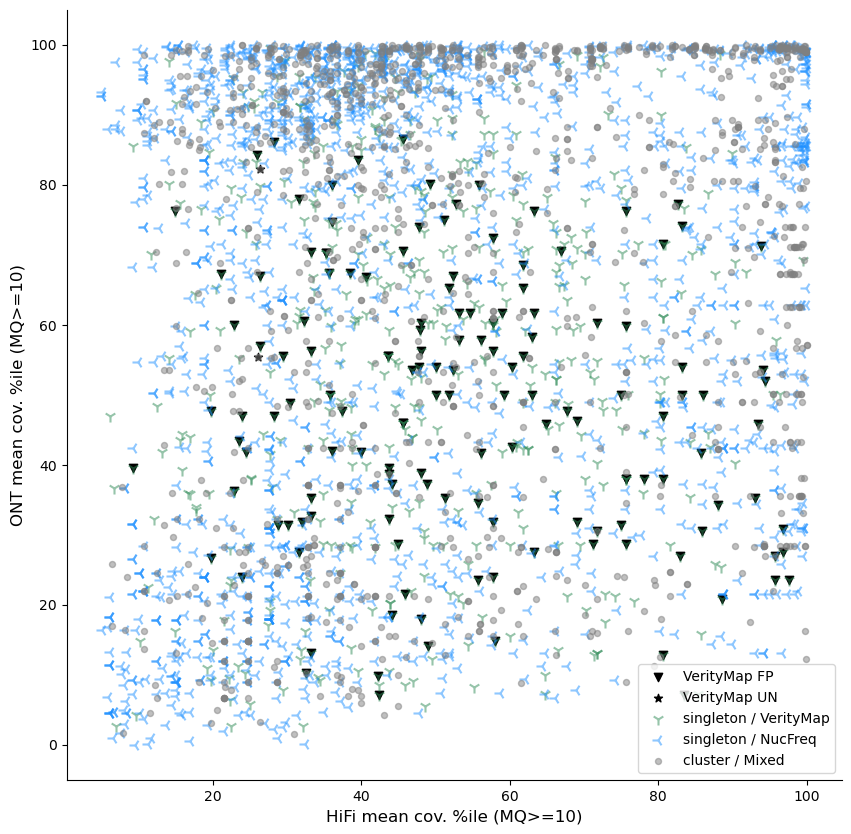

In [10]:
%run prep_flagged_regions.ipynb

datapoints = col.defaultdict(list)
labelpoints = col.defaultdict(list)

for region in origins.itertuples(index=False):
    assert region.software in ["NucFreq", "VerityMap"]
    group = "singleton" if region.cluster_id == "singleton" else "cluster"
    if group == "cluster":
        software = "Mixed"
    else:
        software = region.software
    datapoints[(group, software, "x")].append(region.hifi_MQ10_mean_cov_pct)
    datapoints[(group, software, "y")].append(region.ont_MQ10_mean_cov_pct)
    if region.curated == 1:
        if region.ont_support > 0 or region.hifi_support > 0:
            verdict = "TP"
        elif region.ont_support < 0 and region.hifi_support < 0:
            verdict = "FP"
        else:
            verdict = "UN"
        labelpoints[(group, verdict, "x")].append(region.hifi_MQ10_mean_cov_pct)
        labelpoints[(group, verdict, "y")].append(region.ont_MQ10_mean_cov_pct)
        

groups = {
    "singleton": "dodgerblue",
    "cluster": "orangered"
}

tools = {
    "VerityMap": "1",
    "NucFreq": "3",
    "Mixed": "."
}

labels = {
    #"TP": "^",
    "FP": "v",
    "UN": "*"
}

colors = {
    ("singleton", "VerityMap"): "seagreen",
    ("singleton", "NucFreq"): "dodgerblue",
    ("cluster", "Mixed"): "grey"
}
        
fig, ax = plt.subplots(figsize=(10,10))

for (group, grpcolor), (label, labelmarker) in zip(groups.items(), labels.items()):
    ax.scatter(
        labelpoints[(group, label, "x")],
        labelpoints[(group, label, "y")],
        color="black",
        marker=labelmarker,
        alpha=1,
        label=f"VerityMap {label}"
    )

combinations = itt.product(groups.keys(), tools.keys())
    
for group, tool in combinations:
    
    x_points = datapoints[(group, tool, "x")]
    if not x_points:
        continue
    y_points = datapoints[(group, tool, "y")]
    
    color = colors[(group, tool)]
    toolmarker = tools[tool]
    
    ax.scatter(
        x_points,
        y_points,
        color=color,
        marker=toolmarker,
        alpha=0.5,
        s=75,
        label=f"{group} / {tool}"
    )

ax.set_xlabel("HiFi mean cov. %ile (MQ>=10)", fontsize=12)
ax.set_ylabel("ONT mean cov. %ile (MQ>=10)", fontsize=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend()
print(origins.columns)